In [264]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

data= pd.read_csv('boston.csv')
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PIRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [265]:
X = data.drop(["MEDV"], axis=1)  # 前13列数据
y = data["MEDV"]

df_x=pd.DataFrame(X)
df_y=pd.DataFrame(y)  #利用pandas划分数据集
print(df_x)


        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     PIRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3  

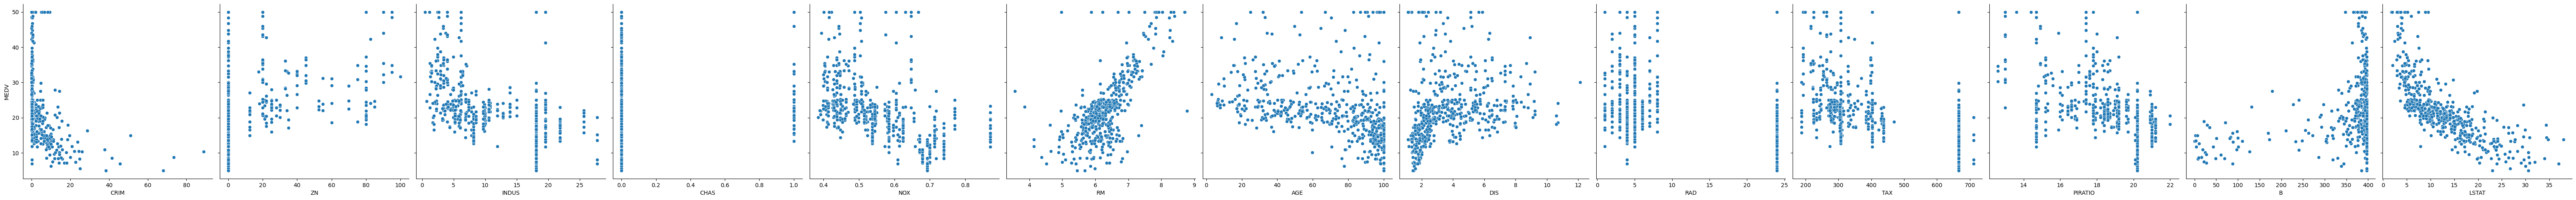

In [266]:
# 显示散点图
sns.pairplot(data,
x_vars=['CRIM', 'ZN', 'INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PIRATIO','B','LSTAT'],
y_vars='MEDV',
height=5, aspect=1, kind='scatter')
plt.show()

In [267]:
X_train=df_x.iloc[0:400,0:14] # 划分训练集，测试集
y_train=df_y.iloc[0:400]
X_test=df_x.iloc[400:,0:14]
y_test=df_y.iloc[400:]


In [268]:
y_train

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
395,13.1
396,12.5
397,8.5
398,5.0


In [269]:
def scaler(train, test): # 归一化函数
    min = train.min(axis=0)
    max = train.max(axis=0) 
    gap = max - min 
    train -= min 
    train /= gap 
    test -= min 
    test /= gap 
    return train, test 

In [270]:
X_train, X_test = scaler(X_train, X_test)
y_train, y_test = scaler(y_train, y_test)

In [271]:
# 定义线性回归的损失函数

def cost_function(X, y, w, b): #MSE
 

    y_hat=np.sum(X*w, axis=1)+b  
    loss=y_hat-y
    cost = np.sum(loss**2)/len(X)

    return cost 

In [273]:
# 线性回归的梯度下降实现
 
def gradient_descent(X, y, w, b, learing_rate, iterations):
    l_record = np.zeros(iterations) # 用数组记录梯度下降过程中损失
                       
    for i in range(iterations): # 梯度下降的迭代
        c=y['MEDV'] # 将df转成series
        y_hat=np.sum(w*X, axis=1)+b
        loss=y_hat-c
        derivative_weight = X.T.dot(loss)/len(X)*2 
        derivative_bias = loss.sum()/len(X)*2 
      
        w = w - learing_rate*derivative_weight # 更新权重
        b = b - learing_rate*derivative_bias 
        l_record[i] = cost_function(X, c, w,b) # 每次迭代的损失存入数组
       
    return l_record,w,b

In [274]:
# 线性回归模型 
def linear_regression(X, y, weight, bias, alpha, iterations): 
    loss_record, weight, bias= gradient_descent(X, y,  weight, bias,alpha, iterations)
                                                                
                                                                  
    print("训练最终损失:", loss_record[-1]) # 打印最终损失
    
    return loss_record, weight, bias # 返回损失记录，最终w,b

In [275]:
# 参数的初始值
iterations = 200; # 迭代200次
alpha = 0.08
weight = -0.3
bias = 0.5


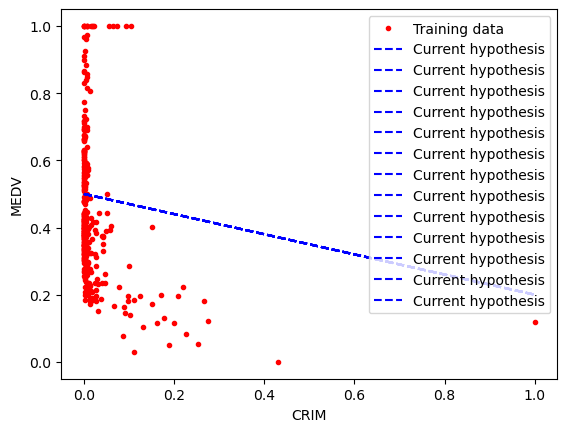

In [276]:
# 以CRIM为例绘制初始的函数模型
plt.plot(X_train['CRIM'], y_train['MEDV'],'r.', label='Training data') # 显示训练集散点图
line_X = np.linspace(X_train.min(), X_train.max(), 500) 
line_y = [weight*xx + bias for xx in line_X] 
plt.plot(line_X,line_y,'b--', label='Current hypothesis' ) 
plt.xlabel('CRIM') 
plt.ylabel('MEDV') 
plt.legend() 
plt.show() 

In [277]:
# 用线性回归模型训练机器，拟合函数
loss_record, weight, bias= linear_regression(X_train,y_train,weight,bias,alpha,iterations)
print("此时的weight：",weight)
print("此时的bias",bias)

训练最终损失: 0.014474791227072065
此时的weight： CRIM      -0.262073
ZN        -0.010538
INDUS     -0.121930
CHAS       0.057950
NOX       -0.138312
RM         0.164804
AGE       -0.040201
DIS       -0.306332
RAD        0.087981
TAX       -0.008454
PIRATIO   -0.249963
B         -0.004877
LSTAT     -0.433613
dtype: float64
此时的bias 0.7847147968142884


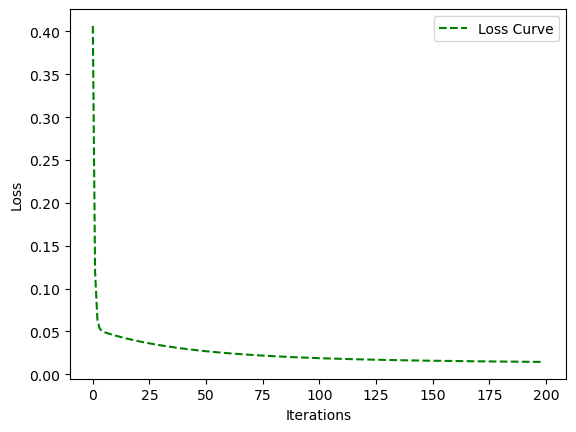

In [278]:
#显示损失曲线
plt.plot(loss_record,'g--',label='Loss Curve')
plt.xlabel('Iterations') 
plt.ylabel('Loss') 
plt.legend() 
plt.show() 

In [279]:
# 测试集损失
loss_test, weight, bias= linear_regression(X_test,y_test,weight,bias,alpha,iterations)

训练最终损失: 0.005188933212071564


In [280]:
import os
print(os.path.abspath('.'))

C:\Users\陈思雨
